In [4]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Create a set of random latitude and longitude combinations; using zip - we'll pack the latitudes and longitudes as pairs
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [6]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [7]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

51.01565836163803 -158.91325304613326
33.78500303427245 158.63719551689871
56.9668169293663 -55.77560263800267
-50.670017903001174 -125.98823871550155
22.195064194214467 23.598659308094994
88.97784938602086 -145.77330023679073
-66.82937167583499 -31.11396733655141
-76.86365523576339 73.3691904295518
-60.368583663702424 -35.11017743069539
62.444787906835586 -49.76397884854839
6.643341072460927 149.85082941575757
-28.022216550301813 84.83952380360131
-80.57250410825662 -75.17352806057558
2.0985193978858376 -46.95455341389024
47.52388184367615 14.11221552931417
20.95925479770206 -96.14757192724946
32.17499118786888 -140.8904221113312
19.38249813188716 95.60921598847057
69.65523099405883 -166.09235928810844
79.98786155102988 -47.7667379454453
-17.939220562105135 -40.75970567120629
3.1949731216471235 -46.71314500851426
59.59577477797765 141.45321372978452
-38.323851507186305 -9.643043111253434
16.074682079525573 62.56063838834561
-5.868894696596897 -62.254818008672316
42.78805894204285 -162

In [8]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [9]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [10]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d6b2e3a4db3dd441dff35baef77ba050


In [12]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 3 of Set 1 | saint anthony
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | faya
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | paamiut
Processing Record 11 of Set 1 | lorengau
Processing Record 12 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 13 of Set 1 | salinopolis
Processing Record 14 of Set 1 | liezen
Processing Record 15 of Set 1 | nautla
Processing Record 16 of Set 1 | fortuna
Processing Record 17 of Set 1 | allanmyo
City not found. Skipping...
Processing Record 18 of Set 1 | nome
Processing Record 19 of Set 1 | upernavik
Processing Record 20 of Set 1 | carlos chagas

In [14]:
size = len(city_data)
print(size)

555


In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.7900,-152.4072,42.31,100,100,17.27,US,2022-11-08 19:50:05
1,Saint Anthony,45.0205,-93.2180,50.49,62,100,25.32,US,2022-11-08 19:50:06
2,Rikitea,-23.1203,-134.9692,75.09,90,77,15.90,PF,2022-11-08 19:48:00
3,Faya,18.3851,42.4509,64.51,76,22,3.36,SA,2022-11-08 19:50:06
4,Barrow,71.2906,-156.7887,32.02,86,100,20.71,US,2022-11-08 19:50:07
5,Ushuaia,-54.8000,-68.3000,53.22,53,40,23.02,AR,2022-11-08 19:50:07
6,Mar Del Plata,-38.0023,-57.5575,78.84,56,0,17.27,AR,2022-11-08 19:49:36
7,Paamiut,61.9940,-49.6678,14.45,58,21,8.30,GL,2022-11-08 19:50:07
8,Lorengau,-2.0226,147.2712,81.21,78,99,5.12,PG,2022-11-08 19:50:08
9,Salinopolis,-0.6136,-47.3561,76.32,88,100,2.82,BR,2022-11-08 19:50:08


In [16]:
#Reorder the columns
city_data_df = pd.DataFrame(city_data)
city_data_df = city_data_df[["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2022-11-08 19:50:05,57.7900,-152.4072,42.31,100,100,17.27
1,Saint Anthony,US,2022-11-08 19:50:06,45.0205,-93.2180,50.49,62,100,25.32
2,Rikitea,PF,2022-11-08 19:48:00,-23.1203,-134.9692,75.09,90,77,15.90
3,Faya,SA,2022-11-08 19:50:06,18.3851,42.4509,64.51,76,22,3.36
4,Barrow,US,2022-11-08 19:50:07,71.2906,-156.7887,32.02,86,100,20.71
5,Ushuaia,AR,2022-11-08 19:50:07,-54.8000,-68.3000,53.22,53,40,23.02
6,Mar Del Plata,AR,2022-11-08 19:49:36,-38.0023,-57.5575,78.84,56,0,17.27
7,Paamiut,GL,2022-11-08 19:50:07,61.9940,-49.6678,14.45,58,21,8.30
8,Lorengau,PG,2022-11-08 19:50:08,-2.0226,147.2712,81.21,78,99,5.12
9,Salinopolis,BR,2022-11-08 19:50:08,-0.6136,-47.3561,76.32,88,100,2.82


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

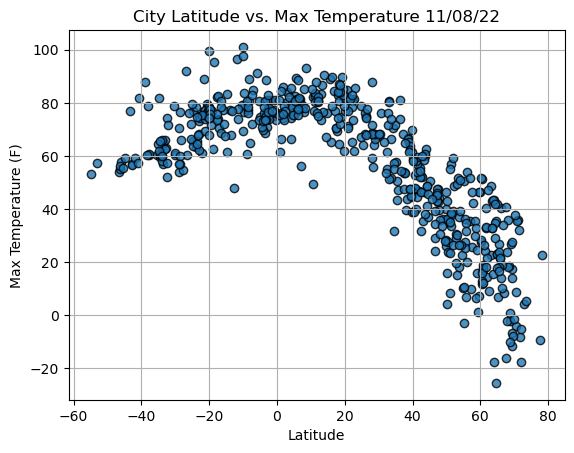

In [35]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

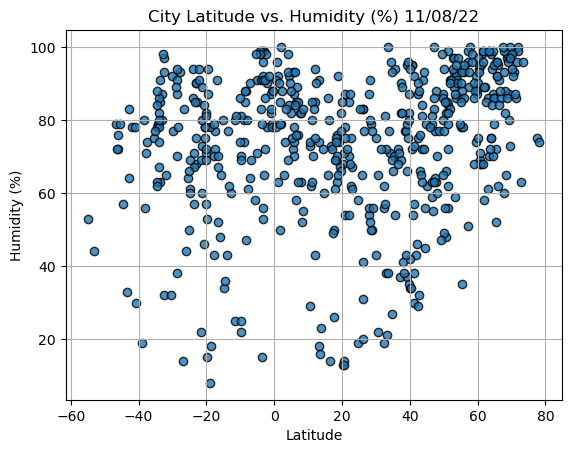

In [36]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity (%) "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

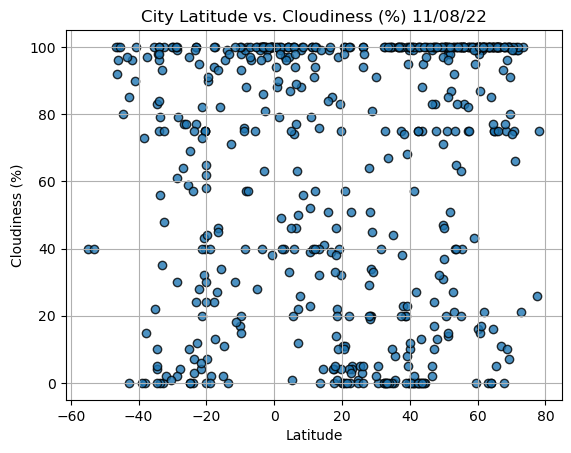

In [37]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

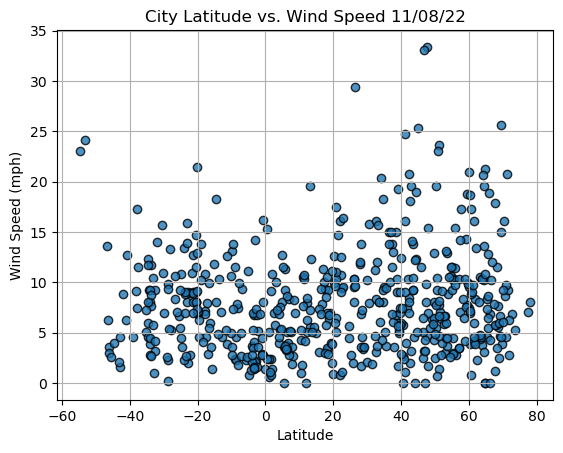

In [38]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()